#### Application to the TSCA Non confidential Active Inventory


Prepared by: Grace Patlewicz <br>
Modified: 29 January 2023 <br>
Changes: enriched TxPs and comparing RFC predictions with those from Nelms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import openpyxl
%matplotlib inline

In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP + 'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'


In [3]:
tsca_txps = pd.read_csv(raw_dir+'output_TSCA_NCT.txt', sep='\t', engine='python')

In [4]:
tsca_txps = tsca_txps.iloc[:,:732]

In [5]:
tsca_txps = tsca_txps[tsca_txps['M_CORINA_SYMPHONY_ERRORS_[STRING]'] == 'No errors']

In [6]:
tsca_txps['M_CORINA_SYMPHONY_ERRORS_[STRING]'].value_counts()

No errors    14067
Name: M_CORINA_SYMPHONY_ERRORS_[STRING], dtype: int64

In [7]:
tsca_txps = tsca_txps.set_index('M_NAME')

In [8]:
import pickle
open_file = open(external_dir+'cols_to_keep_190922.pkl', "rb")

cols_to_keep = pickle.load(open_file)

open_file.close()

In [9]:
tsca_testset = tsca_txps[cols_to_keep]

In [10]:
tsca_testset.index.name = None

In [11]:
tsca_testset

,atom:element_metal_group_I_II,atom:element_metal_metalloid,atom:element_metal_transistion_metal,bond:C#N_nitrile_generic,bond:C#N_nitrile,bond:C(~Z)~C~Q_a-haloalcohol,bond:C(~Z)~C~Q_a-halocarbonyl,bond:C(=O)N_carbamate,bond:C(=O)N_carboxamide_(NH2),bond:C(=O)N_carboxamide_(NHR),...,ring:hetero_[6]_Z_1_3_5-,ring:hetero_[6]_Z_1_4-,ring:hetero_[6]_Z_generic,ring:hetero_[6_6]_N_quinoline,ring:hetero_[6_6]_O_benzopyran,ring:hetero_[6_6]_Z_generic,ring:hetero_[7]_generic_1_4-Z,ring:hetero_[7]_generic_1-Z,ring:hetero_[7]_N_azepine_generic,ring:hetero_[7]_N_diazepine_(1_4-)
DTXSID2052077,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID3064489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID7025055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID6062462,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
DTXSID6021957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID1048706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID0061298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID1022217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID8063830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
filename = 'finalized_model_v2.sav'
final_model = pickle.load(open(external_dir+filename, 'rb'))

In [13]:
predictions = final_model.predict(tsca_testset)

In [14]:
len(predictions)

14067

In [15]:
predictions_df = pd.DataFrame(list(zip(tsca_testset.index, pd.Series(predictions))), columns = ['dtxsid', 'predicted_MSTI'])

In [16]:
predictions_df.predicted_MSTI.value_counts(normalize = True)

0    0.884268
1    0.115732
Name: predicted_MSTI, dtype: float64

In [17]:
predictions_df

,dtxsid,predicted_MSTI
0,DTXSID2052077,0
1,DTXSID3064489,0
2,DTXSID7025055,0
3,DTXSID6062462,1
4,DTXSID6021957,0
...,...,...
14062,DTXSID1048706,0
14063,DTXSID0061298,0
14064,DTXSID1022217,0
14065,DTXSID8063830,0


In [18]:
X_train1 = pd.read_csv(external_dir+'Xtrain1_190922.csv')
X_train1 = X_train1.set_index('Unnamed: 0')
X_train1.index.name = None

In [19]:
X_train1

,atom:element_metal_group_I_II,atom:element_metal_metalloid,atom:element_metal_transistion_metal,bond:C#N_nitrile_generic,bond:C#N_nitrile,bond:C(~Z)~C~Q_a-haloalcohol,bond:C(~Z)~C~Q_a-halocarbonyl,bond:C(=O)N_carbamate,bond:C(=O)N_carboxamide_(NH2),bond:C(=O)N_carboxamide_(NHR),...,ring:hetero_[6]_Z_1_3_5-,ring:hetero_[6]_Z_1_4-,ring:hetero_[6]_Z_generic,ring:hetero_[6_6]_N_quinoline,ring:hetero_[6_6]_O_benzopyran,ring:hetero_[6_6]_Z_generic,ring:hetero_[7]_generic_1_4-Z,ring:hetero_[7]_generic_1-Z,ring:hetero_[7]_N_azepine_generic,ring:hetero_[7]_N_diazepine_(1_4-)
DTXSID7023691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID0021206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID0047032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID8020913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID2047276,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID1020562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID1045952,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
DTXSID4042206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID8046662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
Ht = tsca_testset.dot(np.linalg.inv(X_train1.T.dot(X_train1)).dot(tsca_testset.T))

In [21]:
hat_diag = np.diagonal(Ht)

In [22]:
p = X_train1.shape[1]
n = X_train1.shape[0]

In [23]:
threshold = 3*(p/n)

In [24]:
mylst = []
for i in range(len(hat_diag)):
    if hat_diag[i]> threshold:
        mylst.append(1)
    else:
        mylst.append(0)

In [25]:
len(mylst)

14067

In [26]:
predictions_df['global_domain'] = mylst

In [27]:
#predictions_df.drop(['gloabal_domain'], axis =1, inplace = True)

In [28]:
predictions_df

,dtxsid,predicted_MSTI,global_domain
0,DTXSID2052077,0,0
1,DTXSID3064489,0,0
2,DTXSID7025055,0,0
3,DTXSID6062462,1,1
4,DTXSID6021957,0,0
...,...,...,...
14062,DTXSID1048706,0,0
14063,DTXSID0061298,0,1
14064,DTXSID1022217,0,0
14065,DTXSID8063830,0,0


/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='predicted_MSTI', ylabel='count'>

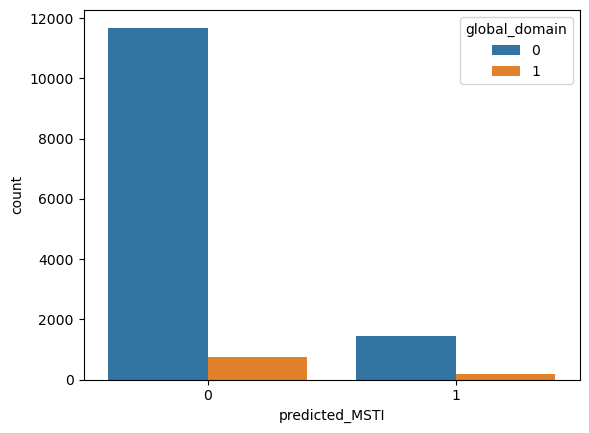

In [29]:
sns.countplot(predictions_df['predicted_MSTI'], hue = predictions_df['global_domain'], data = predictions_df)

In [30]:
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import pairwise_distances

In [31]:
def test_train_distance_matrix(test, train, metric = 'jaccard'):
    '''
    create the pairwise distance matrix of test and training set chemicals but split to 
    return test chemical pairwise distances with the training set chemicals only
    test and train are both df of chemical features
    '''
    concat_df = pd.concat([test, train],axis = 0)
    concat_dist = pd.DataFrame(pairwise_distances(concat_df.values, metric=metric), columns = concat_df.index, index = concat_df.index)
    df = pd.DataFrame(concat_dist.values[:len(test), len(test):], columns = train.index, index = test.index)
    
    return df


In [32]:
def train_distance_matrix(Xtrain, metric = 'jaccard'):
    df = pd.DataFrame(pairwise_distances(Xtrain.values, metric=metric), columns = Xtrain.index, index = Xtrain.index)
    return df

In [33]:
def nn_neighbours(chem, df, n=10):
    '''
    chem is the test chemical of interest
    df is the dataframe of test chemicals and their pairwise similarity with the training set substances
    '''
    chem_nn = df.loc[chem, :].values
    out_arr = np.argsort(chem_nn)[:n]
    dists = chem_nn[out_arr]
    ids = {i:x for i, x in enumerate(df.columns)}
    nns = [ids[e] for e in out_arr]
    df = pd.DataFrame(zip(nns, dists), columns = ['dtxsid', 'dist'])
    df['target'] = chem
    
    return df


In [34]:
tsca_train_dist = test_train_distance_matrix(tsca_testset, X_train1, metric = 'jaccard')

/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [35]:
Xtestdist = []
for dtx in tsca_train_dist.index:
    a = nn_neighbours(dtx,tsca_train_dist, n = 5 )
    Xtestdist.append(a)


In [36]:
Xtest_dist_df = pd.concat(Xtestdist)

In [37]:
ad_test = {}
for i, group in Xtest_dist_df.groupby('target'):
    k = [e for e in group['target']][0]
    v = group['dist'].mean()
    ad_test[k] = v


In [38]:
#AD = 0.5152695751235796
AD = 0.5141447415329768

In [39]:
AD_dict = {}
for k, v in ad_test.items():
    if v <= AD:
        AD_dict[k] = 0
    else:
        AD_dict[k] = 1

In [40]:
AD_df = pd.DataFrame(list(AD_dict.items()), columns = ['dtxsid', 'local_AD'])

In [41]:
AD_df

,dtxsid,local_AD
0,DTXSID001000726,0
1,DTXSID001007489,0
2,DTXSID001014212,0
3,DTXSID001014274,0
4,DTXSID001014286,0
...,...,...
14062,DTXSID90990941,0
14063,DTXSID90992480,0
14064,DTXSID90997177,0
14065,DTXSID90999090,0


In [42]:
predictions_df = pd.merge(predictions_df, AD_df, on = 'dtxsid', how = 'left')

/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


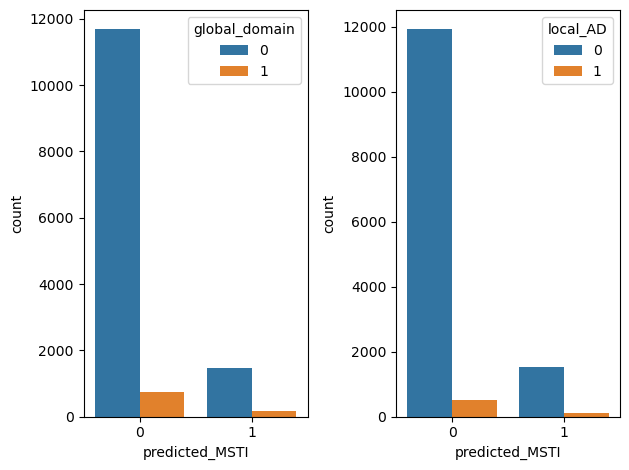

In [43]:
fig, ax = plt.subplots(1,2)

sns.countplot(predictions_df['predicted_MSTI'], hue = predictions_df['global_domain'], data = predictions_df, ax=ax[0])
sns.countplot(predictions_df['predicted_MSTI'], hue = predictions_df['local_AD'], data = predictions_df, ax=ax[1])
plt.tight_layout()

In [44]:
pred_df = predictions_df.groupby(['predicted_MSTI']).agg({'global_domain': 'sum', 'local_AD': 'sum', 'dtxsid': 'count'})

In [45]:
pred_df

,global_domain,local_AD,dtxsid
predicted_MSTI,,,
0,755,516,12439
1,172,104,1628


In [46]:
pred_df.columns = pred_df.columns.get_level_values(0)

In [47]:
pred_df.columns = ['global_domain', 'local_AD', 'predicted_MSTI_outcome']

In [48]:
cols = pred_df.columns.tolist()
cols = cols[-1:] + cols[:-1]

In [49]:
pred_df = pred_df[cols]

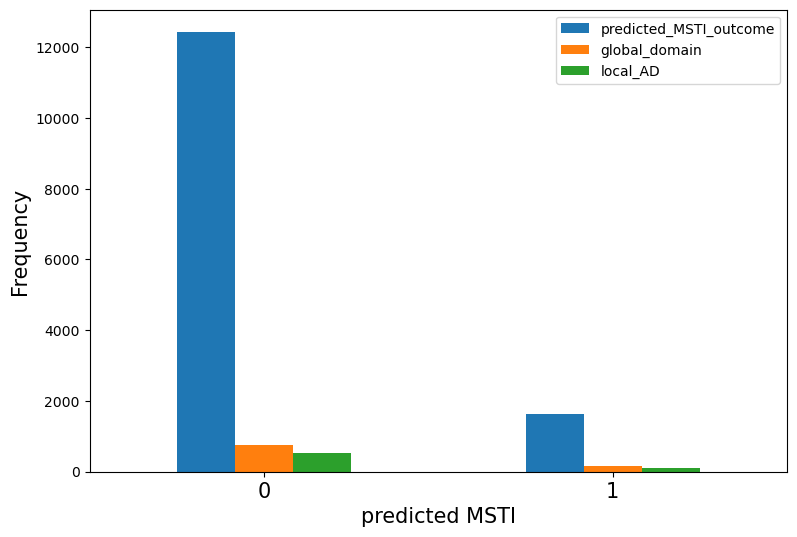

In [51]:
pred_df.plot(kind='bar',stacked=False, figsize = (9,6))
plt.xlabel('predicted MSTI', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(rotation = 360, fontsize = 15)
plt.savefig(figures_dir+'TSCA_predictions_290123.png', dpi = 300)

In [52]:
predictions_df

,dtxsid,predicted_MSTI,global_domain,local_AD
0,DTXSID2052077,0,0,1
1,DTXSID3064489,0,0,0
2,DTXSID7025055,0,0,0
3,DTXSID6062462,1,1,0
4,DTXSID6021957,0,0,0
...,...,...,...,...
14062,DTXSID1048706,0,0,0
14063,DTXSID0061298,0,1,0
14064,DTXSID1022217,0,0,0
14065,DTXSID8063830,0,0,0


In [53]:
tsca_df = pd.read_excel(raw_dir+'TSCA_ACTIVE_NCTI_0320-2022-06-02.xlsx')

In [54]:
tsca_df.rename(columns = {'DTXSID' : 'dtxsid'}, inplace = True)

In [55]:
tsca_df.columns

Index(['dtxsid', 'PREFERRED NAME', 'CASRN', 'INCHIKEY', 'IUPAC NAME', 'SMILES',
       'INCHI STRING', 'MOLECULAR FORMULA', 'AVERAGE MASS',
       'MONOISOTOPIC MASS', '# of SOURCES', '# OF PUBMED ARTICLES',
       'PUBCHEM DATA SOURCES', 'CPDAT COUNT', 'QC Level', '# ToxCast Active',
       '% ToxCast Active', 'Total Assays'],
      dtype='object')

In [56]:
tsca_df = pd.merge(predictions_df, tsca_df[['dtxsid', 'PREFERRED NAME', 'SMILES']], on = 'dtxsid', how = 'left')

In [57]:
tsca_df[tsca_df['predicted_MSTI'] == 1]

,dtxsid,predicted_MSTI,global_domain,local_AD,PREFERRED NAME,SMILES
3,DTXSID6062462,1,1,0,"Quino[2,3-b]acridine-6,7,13,14(5H,12H)-tetrone...",OC1=C2C=C(Cl)C=CC2=NC2=C1C(=O)C1=C(C(O)=C3C=C(...
5,DTXSID3066716,1,0,0,".beta.-Alanine, N-ethyl-N-phenyl-, methyl ester",CCN(CCC(=O)OC)C1=CC=CC=C1
8,DTXSID5025863,1,0,0,2-Ethoxyaniline,CCOC1=C(N)C=CC=C1
15,DTXSID3060409,1,0,0,"Benzene, 1-bromo-3-nitro-",[O-][N+](=O)C1=CC(Br)=CC=C1
24,DTXSID1067411,1,0,0,2-(7-(Diethylamino)-2-oxo-2H-1-benzopyran-3-yl...,CCN(CC)C1=CC=C2C=C(C(=O)OC2=C1)C1=NC(=O)C2=CC=...
...,...,...,...,...,...,...
14009,DTXSID7070979,1,0,0,"Isopropylidenedi-1,4-phenylene bis(2-aminobenz...",CC(C)(C1=CC=C(OS(=O)(=O)C2=C(N)C=CC=C2)C=C1)C1...
14019,DTXSID2059061,1,0,0,"2-Naphthalenecarboxamide, N-(5-chloro-2,4-dime...",COC1=CC(OC)=C(NC(=O)C2=C(O)C=C3C=CC=CC3=C2)C=C1Cl
14020,DTXSID9071139,1,0,0,4-((4-Chloro-2-methylphenyl)azo)-3-hydroxy-N-(...,CC1=C(NC(=O)C2=C(O)C(N=NC3=C(C)C=C(Cl)C=C3)=C3...
14027,DTXSID5051947,1,0,0,Bisaniline P,CC(C)(C1=CC=C(N)C=C1)C1=CC=C(C=C1)C(C)(C)C1=CC...


In [61]:
txp_msti_enriched = pd.read_csv(interim_dir+'enriched_TxPs_250123.csv')

In [62]:
enriched_txps = txp_msti_enriched['TxP'].tolist()

In [63]:
len(enriched_txps)

47

In [64]:
(tsca_txps[enriched_txps] == 1).any(axis = 1)

DTXSID2052077    False
DTXSID3064489    False
DTXSID7025055    False
DTXSID6062462     True
DTXSID6021957    False
                 ...  
DTXSID1048706     True
DTXSID0061298    False
DTXSID1022217    False
DTXSID8063830    False
DTXSID9062483    False
Length: 14067, dtype: bool

In [65]:
en = []
for i, row in tsca_txps[enriched_txps].iterrows():
    if row.any() == 1:
        a= row[row==1]
        en.append([i,a])

In [66]:
en[0][1].index[0]

'bond:CC(=O)C_quinone_1_4-benzo'

In [67]:
sar_tsca_df = pd.DataFrame([[e[0],e[1].index[0]] for e in en], columns = ['dtxsid', 'enriched_txp'])

In [68]:
sar_tsca_df['dtxsid']

0       DTXSID6062462
1       DTXSID3066716
2       DTXSID8048860
3       DTXSID5025863
4       DTXSID3060409
            ...      
2898    DTXSID5051947
2899    DTXSID7026283
2900    DTXSID7029162
2901    DTXSID0062680
2902    DTXSID1048706
Name: dtxsid, Length: 2903, dtype: object

In [69]:
predictions_df['enriched_TxP'] = predictions_df['dtxsid'].apply(lambda x: 1 if x in sar_tsca_df['dtxsid'].tolist() else 0 )

In [70]:
predictions_df['enriched_TxP'].value_counts()

0    11164
1     2903
Name: enriched_TxP, dtype: int64

In [71]:
pd.crosstab(predictions_df.predicted_MSTI, predictions_df.enriched_TxP)

enriched_TxP,0,1
predicted_MSTI,,
0,11025,1414
1,139,1489


In [72]:
from sklearn.metrics import confusion_matrix, classification_report
tn, fp, fn, tp = confusion_matrix(predictions_df.predicted_MSTI, predictions_df.enriched_TxP).ravel()
tn, fp, fn, tp

(11025, 1414, 139, 1489)

In [73]:
print(classification_report(predictions_df.predicted_MSTI, predictions_df.enriched_TxP))

              precision    recall  f1-score   support

           0       0.99      0.89      0.93     12439
           1       0.51      0.91      0.66      1628

    accuracy                           0.89     14067
   macro avg       0.75      0.90      0.80     14067
weighted avg       0.93      0.89      0.90     14067



In [74]:
from sklearn.metrics import roc_auc_score, balanced_accuracy_score
roc_auc_score(predictions_df.predicted_MSTI, predictions_df.enriched_TxP)

0.9004722159618052

In [75]:
balanced_accuracy_score(predictions_df.predicted_MSTI, predictions_df.enriched_TxP)

0.9004722159618052

In [76]:
predictions_df['final_outcome'] = predictions_df[['predicted_MSTI', 'enriched_TxP']].apply(lambda x : x[0]+x[1] , axis = 1)

In [77]:
predictions_df

,dtxsid,predicted_MSTI,global_domain,local_AD,enriched_TxP,final_outcome
0,DTXSID2052077,0,0,1,0,0
1,DTXSID3064489,0,0,0,0,0
2,DTXSID7025055,0,0,0,0,0
3,DTXSID6062462,1,1,0,1,2
4,DTXSID6021957,0,0,0,0,0
...,...,...,...,...,...,...
14062,DTXSID1048706,0,0,0,1,1
14063,DTXSID0061298,0,1,0,0,0
14064,DTXSID1022217,0,0,0,0,0
14065,DTXSID8063830,0,0,0,0,0


In [78]:
final_pred = {}
for i, a,b,c,d in zip(predictions_df['dtxsid'], predictions_df['predicted_MSTI'], predictions_df['global_domain'], predictions_df['local_AD'], predictions_df['enriched_TxP']):
    #print(i,a)
    if (b & c) == 0:
        final_pred[i] = np.sum(a+d)
    if (b | c ) == 1:
        final_pred[i] = np.sum(a+d)*0.5

In [79]:
len(final_pred)

14067

In [80]:
#predictions_df.drop(['final_outcome', 'final'], axis =1, inplace = True)

In [81]:
predictions_df = pd.merge(predictions_df, pd.DataFrame(list(final_pred.items()) ,columns = ['dtxsid', 'final_outcome']), on = 'dtxsid', how = 'left')

In [82]:
predictions_df

,dtxsid,predicted_MSTI,global_domain,local_AD,enriched_TxP,final_outcome_x,final_outcome_y
0,DTXSID2052077,0,0,1,0,0,0.0
1,DTXSID3064489,0,0,0,0,0,0.0
2,DTXSID7025055,0,0,0,0,0,0.0
3,DTXSID6062462,1,1,0,1,2,1.0
4,DTXSID6021957,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...
14062,DTXSID1048706,0,0,0,1,1,1.0
14063,DTXSID0061298,0,1,0,0,0,0.0
14064,DTXSID1022217,0,0,0,0,0,0.0
14065,DTXSID8063830,0,0,0,0,0,0.0


In [83]:
order = [0,0.5,1,2]

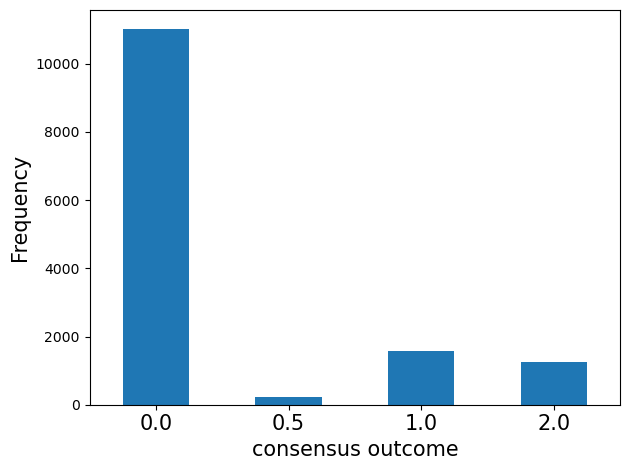

In [84]:
predictions_df.set_index('final_outcome_y').loc[order].groupby('final_outcome_y')['dtxsid'].count().plot(kind='bar')
plt.xlabel('consensus outcome', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(rotation = 360, fontsize = 15)
plt.tight_layout()

plt.savefig(figures_dir+'Figure12_290123.png', dpi = 300)

In [85]:
predictions_df

,dtxsid,predicted_MSTI,global_domain,local_AD,enriched_TxP,final_outcome_x,final_outcome_y
0,DTXSID2052077,0,0,1,0,0,0.0
1,DTXSID3064489,0,0,0,0,0,0.0
2,DTXSID7025055,0,0,0,0,0,0.0
3,DTXSID6062462,1,1,0,1,2,1.0
4,DTXSID6021957,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...
14062,DTXSID1048706,0,0,0,1,1,1.0
14063,DTXSID0061298,0,1,0,0,0,0.0
14064,DTXSID1022217,0,0,0,0,0,0.0
14065,DTXSID8063830,0,0,0,0,0,0.0


In [86]:
tsca_df2 = pd.merge(predictions_df, tsca_df[['dtxsid', 'PREFERRED NAME', 'SMILES']], on = 'dtxsid', how = 'left')

In [87]:
tsca_df2.drop(['final_outcome_x'], axis = 1, inplace = True)

In [88]:
tsca_df2.rename(columns = {'final_outcome_y': 'final_outcome'}, inplace = True)

In [89]:
tsca_df2.to_csv(processed_dir+'TSCA_predictions_290123.csv')

In [91]:
tsca_df2

,dtxsid,predicted_MSTI,global_domain,local_AD,enriched_TxP,final_outcome,PREFERRED NAME,SMILES
0,DTXSID2052077,0,0,1,0,0.0,Methyl cyclopentylideneacetate,COC(=O)C=C1CCCC1
1,DTXSID3064489,0,0,0,0,0.0,"Urea, N,N'-bis(2-methoxyethyl)-",COCCNC(=O)NCCOC
2,DTXSID7025055,0,0,0,0,0.0,Bis(2-ethylhexyl) decanedioate,CCCCC(CC)COC(=O)CCCCCCCCC(=O)OCC(CC)CCCC
3,DTXSID6062462,1,1,0,1,1.0,"Quino[2,3-b]acridine-6,7,13,14(5H,12H)-tetrone...",OC1=C2C=C(Cl)C=CC2=NC2=C1C(=O)C1=C(C(O)=C3C=C(...
4,DTXSID6021957,0,0,0,0,0.0,Phenyl salicylate,OC1=C(C=CC=C1)C(=O)OC1=CC=CC=C1
...,...,...,...,...,...,...,...,...
14062,DTXSID1048706,0,0,0,1,1.0,trans-Aconitic acid,OC(=O)C\C(=C/C(O)=O)C(O)=O
14063,DTXSID0061298,0,1,0,0,0.0,"1-Butene, 4-chloro-",ClCCC=C
14064,DTXSID1022217,0,0,0,0,0.0,"2,4,5-Trimethoxybenzaldehyde",COC1=CC(OC)=C(C=O)C=C1OC
14065,DTXSID8063830,0,0,0,0,0.0,"2,5-Dioxo-1,3,4,6- tetrakis(hydroxymethyl)hexa...",OCN1C2C(N(CO)C1=O)N(CO)C(=O)N2CO


Comparing RFC predictions with the Nelms predictions for the TSCA chemicals

In [92]:
nelms_df = pd.read_csv(external_dir+'nelms_tsca_300123.csv')

In [93]:
nelms_df

,dtxsid,dow_alerts,enoch_alerts,oecd_alerts,OverAll,final
0,DTXSID2052077,0,1,0,1,1
1,DTXSID3064489,0,0,0,0,0
2,DTXSID7025055,0,0,0,0,0
3,DTXSID6062462,0,0,0,0,0
4,DTXSID6021957,0,1,1,2,1
...,...,...,...,...,...,...
14267,DTXSID1048706,1,1,0,2,1
14268,DTXSID0061298,1,1,1,3,1
14269,DTXSID1022217,1,1,1,3,1
14270,DTXSID8063830,0,0,1,1,1


In [95]:
tsca_nelms_df = pd.merge(tsca_df2, nelms_df[['dtxsid', 'final']], on = 'dtxsid', how = 'left')

In [103]:
tsca_nelms_df.dropna()

,dtxsid,predicted_MSTI,global_domain,local_AD,enriched_TxP,final_outcome,PREFERRED NAME,SMILES,final
0,DTXSID2052077,0,0,1,0,0.0,Methyl cyclopentylideneacetate,COC(=O)C=C1CCCC1,1.0
1,DTXSID3064489,0,0,0,0,0.0,"Urea, N,N'-bis(2-methoxyethyl)-",COCCNC(=O)NCCOC,0.0
2,DTXSID7025055,0,0,0,0,0.0,Bis(2-ethylhexyl) decanedioate,CCCCC(CC)COC(=O)CCCCCCCCC(=O)OCC(CC)CCCC,0.0
3,DTXSID6062462,1,1,0,1,1.0,"Quino[2,3-b]acridine-6,7,13,14(5H,12H)-tetrone...",OC1=C2C=C(Cl)C=CC2=NC2=C1C(=O)C1=C(C(O)=C3C=C(...,0.0
4,DTXSID6021957,0,0,0,0,0.0,Phenyl salicylate,OC1=C(C=CC=C1)C(=O)OC1=CC=CC=C1,1.0
...,...,...,...,...,...,...,...,...,...
14062,DTXSID1048706,0,0,0,1,1.0,trans-Aconitic acid,OC(=O)C\C(=C/C(O)=O)C(O)=O,1.0
14063,DTXSID0061298,0,1,0,0,0.0,"1-Butene, 4-chloro-",ClCCC=C,1.0
14064,DTXSID1022217,0,0,0,0,0.0,"2,4,5-Trimethoxybenzaldehyde",COC1=CC(OC)=C(C=O)C=C1OC,1.0
14065,DTXSID8063830,0,0,0,0,0.0,"2,5-Dioxo-1,3,4,6- tetrakis(hydroxymethyl)hexa...",OCN1C2C(N(CO)C1=O)N(CO)C(=O)N2CO,1.0


In [111]:
pd.crosstab(tsca_nelms_df.dropna()['predicted_MSTI'], tsca_nelms_df.dropna()['final'])

final,0.0,1.0
predicted_MSTI,,
0,7683,4706
1,717,910


In [98]:
from sklearn.metrics import confusion_matrix, classification_report,precision_recall_curve


In [99]:
tsca_nelms_df.final.value_counts(normalize = True)

0.0    0.599315
1.0    0.400685
Name: final, dtype: float64

In [122]:
tsca_nelms_df['predicted_MSTI'].value_counts(normalize = True)

0    0.884268
1    0.115732
Name: predicted_MSTI, dtype: float64

In [112]:
confusion_matrix(tsca_nelms_df.dropna()['predicted_MSTI'], tsca_nelms_df.dropna()['final'], labels=[1,0])

array([[ 910,  717],
       [4706, 7683]])

In [113]:
tn, fp, fn, tp = confusion_matrix(tsca_nelms_df.dropna()['predicted_MSTI'], tsca_nelms_df.dropna()['final'], labels=[0,1]).ravel()

Sensitivity

In [119]:
sens = tp/(tp+fn)

Specificity

In [120]:
spec = tn/(tn+fp)

BA = Sensitivity + Specificity) / 2

In [121]:
(sens+spec)/2

0.5897292604920508